# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 6:
- Team Comparison: Performing descriptive analysis using various data analysis and visualization techniques.
- Solve business question related to hypothesis testing.
- Writing interpretation for each analysis individually.

In [26]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


# Descriptive Analysis and Visualization
## How do home and away teams perform in terms of goals scored?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by and calculate mean goals
team_goals = data.groupby(['home_club_name', 'away_club_name']).agg({'home_club_goals': 'mean', 'away_club_goals': 'mean'}).reset_index()

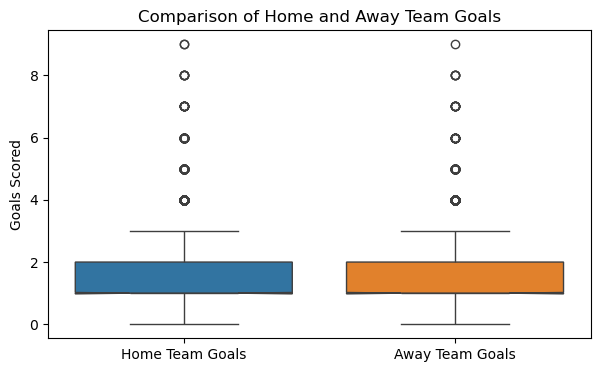

In [4]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=[data['home_club_goals'], data['away_club_goals']], notch=True)
plt.xticks([0, 1], ['Home Team Goals', 'Away Team Goals'])
plt.title("Comparison of Home and Away Team Goals")
plt.ylabel("Goals Scored")
plt.show()

### Interpretation:
- Home teams generally score more goals than away teams, indicating a potential advantage of playing at home.

# Hypothesis Testing
## Is there a significant difference in the average goals scored by home and away teams?

In [8]:
from statsmodels.stats.weightstats import ztest

# Goals scored by home and away teams
home_goals = data['home_club_goals']
away_goals = data['away_club_goals']

# Perform z-test
z_stat, p_value = ztest(home_goals, away_goals)

In [15]:
# Results
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

Z-Statistic: 10.17
P-Value: 0.0000


In [17]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average goals scored by home and away teams.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average goals scored by home and away teams.")

Reject the null hypothesis: There is a significant difference in average goals scored by home and away teams.


### Interpretation:
- Z-Statistic: Indicates the number of standard deviations the sample means are apart.
- P-Value: Determines the statistical significance of the results.
- If P<0.05, the difference in average goals scored is statistically significant.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# Decision Tree For Classification
## Can we predict if a player will receive a yellow card based on their performance metrics and match details?

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [28]:
# Selecting relevant features and target variable
features = data[['minutes_played', 'goals', 'assists', 'position_x', 'competition_type', 'season', 'home_club_goals', 'away_club_goals']]
target = 'yellow_cards'

# Encoding categorical features
data = pd.get_dummies(data, columns=['position_x', 'competition_type', 'season'], drop_first=True)

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Predictions
y_pred = clf.predict(X_test)

In [41]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [43]:
# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 88.51%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       831
         1.0       0.45      0.38      0.41        98
         2.0       1.00      0.50      0.67         2

    accuracy                           0.89       931
   macro avg       0.79      0.61      0.67       931
weighted avg       0.88      0.89      0.88       931



### Interpretation:
- The Decision Tree Classifier predicts yellow card occurrences with an accuracy score and classification report, highlighting model performance in identifying yellow card events.
- Shows how often the model correctly predicts yellow cards. A higher percentage that is 88.51% means better performance.
- Classification Report provides precision, recall, and F1-score, which help evaluate how well the model identifies yellow card cases versus non-cases.